In [26]:
import numpy as np
import pandas as pd
import shap

import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import pandas as pd

#label = "cc_valid_fin10_"
label = "quick_info_first_"
main = '/Users/kmontgomery/Documents/xnn/blds_short/'

In [27]:
Ridge_x = pd.read_csv(main + "ridge_x_" + label + ".csv")
Ridge_y = pd.read_csv(main + "ridge_y_" + label + ".csv")
Scores = pd.read_csv(main + "scores_" + label + ".csv")
WP = pd.read_csv(main + "wp_" + label + ".csv")
TEST = pd.read_csv(main + "TEST_" + label + ".csv")
PREDS = pd.read_csv(main + "preds_" + label + ".csv")

In [28]:
Ridge_y.shape
Ridge_y.index

RangeIndex(start=0, stop=8, step=1)

In [29]:
cn = Ridge_y.index

Ridge_y = Ridge_y.applymap(lambda x: eval(x)[0])

In [30]:
Ridge_y.head(2)

,0,1,2,3,4,5,6,7,8,9,...,143990,143991,143992,143993,143994,143995,143996,143997,143998,143999
0,-0.000036,-0.000032,-0.000030,-0.000032,-0.000036,-0.000036,-0.000042,-0.000025,-0.000029,-0.000032,...,-0.000033,-0.000035,-0.000024,-0.000036,-0.000031,-0.000036,-0.000030,-0.000030,-0.000035,-0.000036
1,2.634409,-2.024133,-2.670411,-0.238199,0.322642,0.660113,2.634409,-2.674508,-0.100631,-0.485125,...,-0.589904,-0.617348,-1.284495,0.149490,-3.289896,0.217577,-3.811146,-2.004719,0.098753,-0.425689


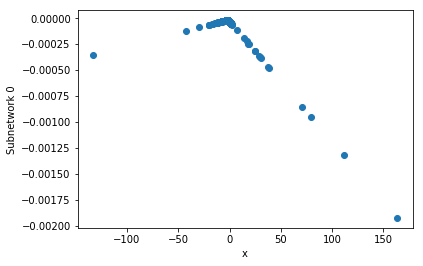

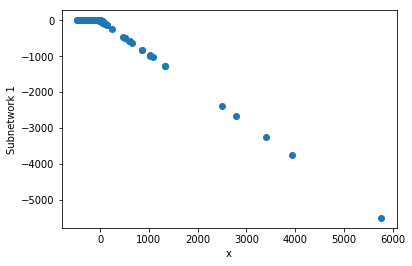

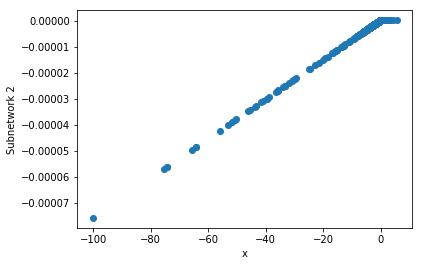

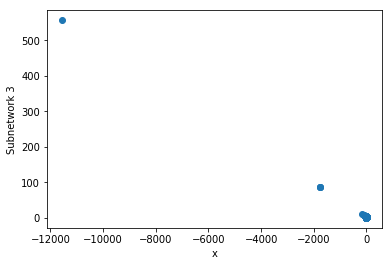

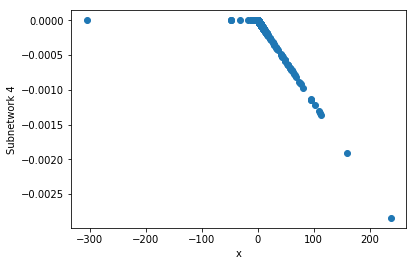

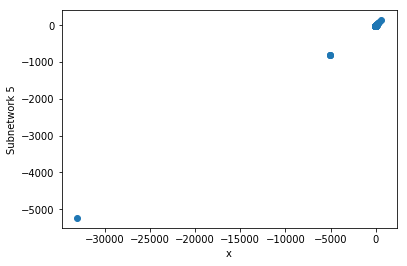

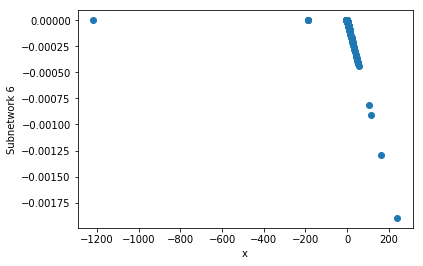

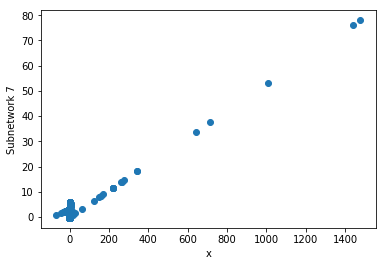

In [31]:
for row_num in range(Ridge_y.shape[0]):
    plt.plot(Ridge_x.iloc[row_num,:], Ridge_y.iloc[row_num,:], 'o')
    plt.xlabel("x")
    plt.ylabel("Subnetwork " + str(row_num))
    plt.show()

In [32]:
Scores

,0,1,2,3,4,5,6,7
0,1.008811e-01,-0.058764,3.926671e-01,0.064936,5.415082e-02,-0.974163,1.341143e-01,0.811697
1,-6.355319e-06,0.169309,-1.155217e-06,-0.528930,2.968540e-05,0.570227,-1.741989e-06,0.318313
2,-1.707999e-03,-0.018022,1.627514e-02,-0.000004,-1.302518e-03,-0.008990,-2.748539e-03,0.016662
3,-7.270611e-08,0.000476,-1.321593e-08,-0.000045,-4.562832e-07,0.004284,-1.992882e-08,-0.004670
4,1.365944e-02,0.003704,-3.897955e-03,0.000132,-1.376878e-03,0.001962,1.631410e-06,0.001018
5,-1.022860e-02,0.018417,8.856259e-04,-0.002052,3.053225e-03,0.016211,2.512490e-03,-0.028754
6,7.175745e-10,-0.004217,3.219865e-10,-0.002202,-9.955603e-10,0.004812,-3.512287e-10,0.001652


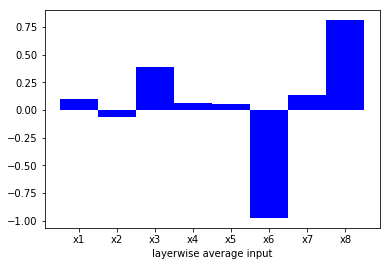

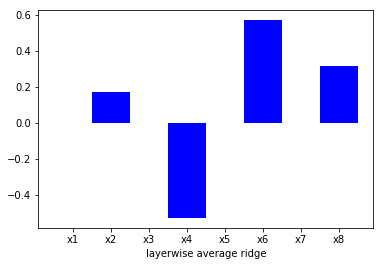

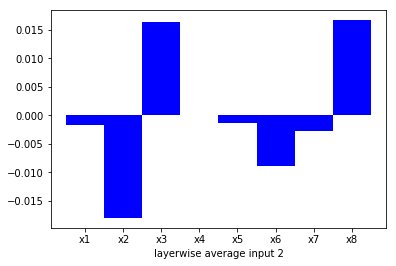

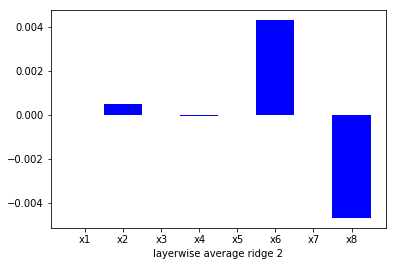

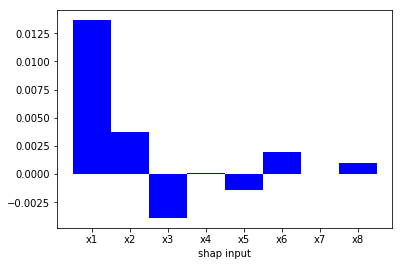

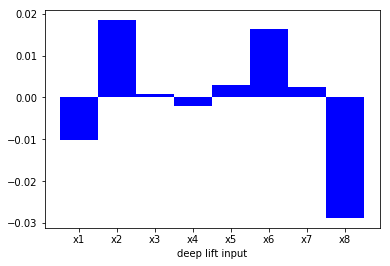

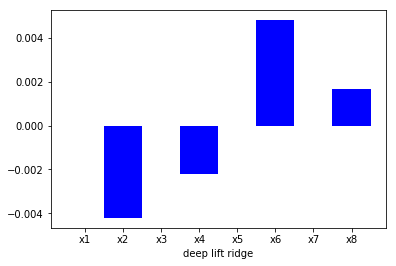

'\nplt.bar(x, abs(np.reshape(feature_output2[ind][0:features], (1,features))[0]), 1, color="blue")\nplt.xlabel("Input Layerwise Propagation Score Example " + str(ind))\nplt.ylabel("")\nplt.show()\n\nplt.bar(x, abs(np.reshape(feature_output2[ind][features:(2*features)], (1,features))[0]), 1, color="blue")\nplt.xlabel("Ridge Layerwise Propagation Score Example " + str(ind))\nplt.ylabel("Weight value")\nplt.show()\n\nplt.bar(x, abs(np.reshape(feature_output2[ind][2*features:(3*features)], (1,features))[0]), 1, color="blue")\nplt.xlabel("Deep Lift Input Score Example " + str(ind))\nplt.ylabel("Weight value")\nplt.show()\n\n\nplt.bar(x, abs(np.reshape(feature_output2[ind][3*features:(4*features)], (1,features))[0]), 1, color="blue")\nplt.xlabel("Deep Lift Ridge Score Example " + str(ind))\nplt.ylabel("Weight value")\nplt.show()\n      \nplt.bar(x, abs(np.reshape(layerwise_average_input, (1,features))[0]), 1, color="blue")\nplt.xlabel("Input Layerwise Propagation Score Average")\nplt.ylabel(

In [33]:
# Print the scores
x = list(map(lambda x: 'x' + str(x+1), range(Scores.shape[1])))

titles = ["layerwise average input", "layerwise average ridge",
          "layerwise average input 2", "layerwise average ridge 2",
          "shap input", "deep lift input", "deep lift ridge"]

for ind in range(len(Scores)):
    plt.bar(x, Scores.iloc[ind,:], 1, color="blue")
    plt.xlabel(titles[ind])
    plt.ylabel("")
    plt.show()
"""
plt.bar(x, abs(np.reshape(feature_output2[ind][0:features], (1,features))[0]), 1, color="blue")
plt.xlabel("Input Layerwise Propagation Score Example " + str(ind))
plt.ylabel("")
plt.show()

plt.bar(x, abs(np.reshape(feature_output2[ind][features:(2*features)], (1,features))[0]), 1, color="blue")
plt.xlabel("Ridge Layerwise Propagation Score Example " + str(ind))
plt.ylabel("Weight value")
plt.show()

plt.bar(x, abs(np.reshape(feature_output2[ind][2*features:(3*features)], (1,features))[0]), 1, color="blue")
plt.xlabel("Deep Lift Input Score Example " + str(ind))
plt.ylabel("Weight value")
plt.show()


plt.bar(x, abs(np.reshape(feature_output2[ind][3*features:(4*features)], (1,features))[0]), 1, color="blue")
plt.xlabel("Deep Lift Ridge Score Example " + str(ind))
plt.ylabel("Weight value")
plt.show()
      
plt.bar(x, abs(np.reshape(layerwise_average_input, (1,features))[0]), 1, color="blue")
plt.xlabel("Input Layerwise Propagation Score Average")
plt.ylabel("")
plt.show()

plt.bar(x, abs(np.reshape(layerwise_average_ridge, (1,features))[0]), 1, color="blue")
plt.xlabel("Ridge Layerwise Propagation Score Average")
plt.ylabel("Weight value")
plt.show()


plt.bar(x, abs(np.reshape(layerwise_average_input2, (1,features))[0]), 1, color="blue")
plt.xlabel("Input Layerwise Propagation Score Average 2")
plt.ylabel("")
plt.show()

plt.bar(x, abs(np.reshape(layerwise_average_ridge2, (1,features))[0]), 1, color="blue")
plt.xlabel("Ridge Layerwise Propagation Score Average 2")
plt.ylabel("Weight value")
plt.show()
"""

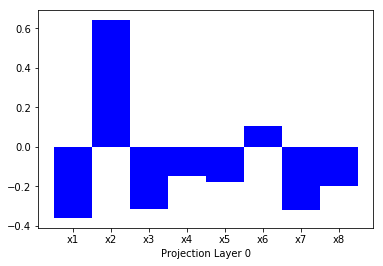

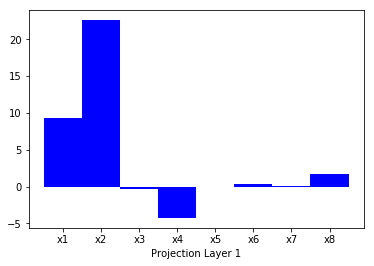

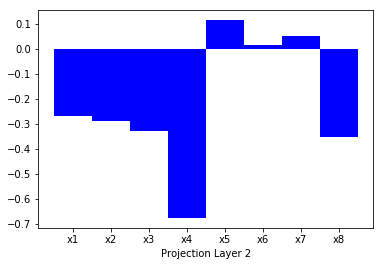

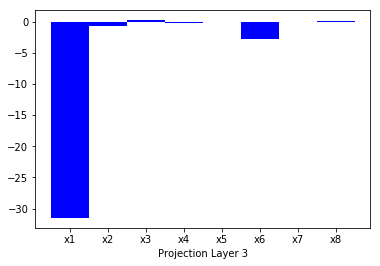

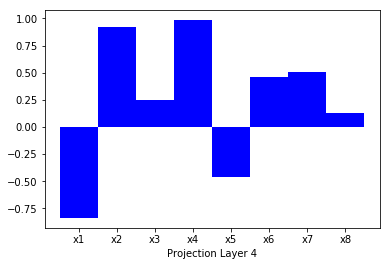

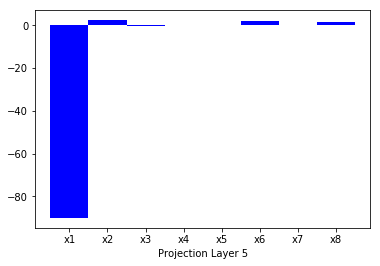

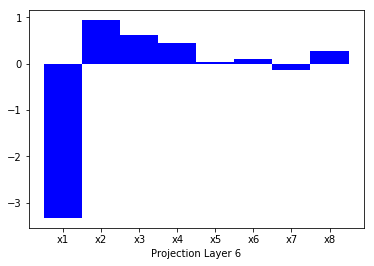

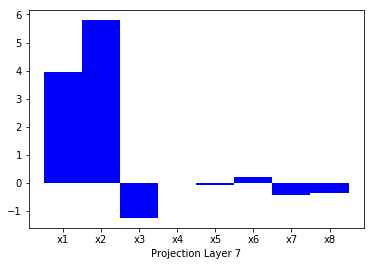

In [34]:
# Print the scores
x = list(map(lambda x: 'x' + str(x+1), range(Scores.shape[1])))

titles = ["Projection Layer " + str(ii) for ii in range(Scores.shape[1])]

for ind in range(len(WP)):
    plt.bar(x, WP.iloc[ind,:], 1, color="blue")
    plt.xlabel(titles[ind])
    plt.ylabel("")
    plt.show()

In [35]:
TEST.iloc[0:4,]

,loan_amount,loan_to_value_ratio,high_priced,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,property_value,income,...,debt_to_income_ratio_Exempt.1,loan_amount_std,loan_to_value_ratio_std,discount_points_std,lender_credits_std,loan_term_std,prepayment_penalty_term_std,intro_rate_period_std,property_value_std,income_std
0,75000,95.000,0,1068.75,-1.0,360.0,-1.0,-1.0,75000.0,33.0,...,0,-0.860031,0.002212,0.359428,-0.306342,0.249762,-0.017041,-0.220705,-0.095474,-0.065176
1,545000,100.000,0,-1.00,-1.0,360.0,-1.0,-1.0,545000.0,298.0,...,0,1.153864,0.005063,-0.353662,-0.306342,0.249762,-0.017041,-0.220705,0.059397,0.117048
2,345000,68.082,0,-1.00,1735.0,360.0,-1.0,-1.0,515000.0,78.0,...,0,0.296887,-0.013136,-0.353662,1.159204,0.249762,-0.017041,-0.220705,0.049512,-0.034232
3,265000,100.000,0,2873.67,-1.0,360.0,-1.0,-1.0,265000.0,181.0,...,0,-0.045904,0.005063,1.562577,-0.306342,0.249762,-0.017041,-0.220705,-0.032866,0.036594


In [36]:
PREDS.iloc[0:4,]

,0,1,2,3,4,5,6,7,8,9
0,0.228528,0.010942,0.153826,-0.037796,-0.014946,0.004805,0.007254,0.001238,0.001878,0.101328
1,0.032335,0.001416,-0.001231,-0.074274,0.014774,-0.007254,0.000526,-0.000810,-0.002140,0.101328
2,0.007366,-0.062020,-0.017036,-0.007004,0.000028,-0.002800,-0.001572,-0.000445,-0.003113,0.101328
3,0.131797,0.006096,0.004534,-0.017097,0.013325,0.018701,0.005219,-0.000374,0.000065,0.101328


In [37]:
min(PREDS.iloc[:,0])

0.0

In [39]:
from sklearn.metrics import log_loss

LL = log_loss(TEST["high_priced"], PREDS.iloc[:,0])

print(LL)

0.27844341133921857


In [40]:
TEST.iloc[0:10,]

,loan_amount,loan_to_value_ratio,high_priced,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,property_value,income,...,debt_to_income_ratio_Exempt.1,loan_amount_std,loan_to_value_ratio_std,discount_points_std,lender_credits_std,loan_term_std,prepayment_penalty_term_std,intro_rate_period_std,property_value_std,income_std
0,75000,95.000,0,1068.75,-1.00,360.0,-1.0,-1.0,75000.0,33.0,...,0,-0.860031,0.002212,0.359428,-0.306342,0.249762,-0.017041,-0.220705,-0.095474,-0.065176
1,545000,100.000,0,-1.00,-1.00,360.0,-1.0,-1.0,545000.0,298.0,...,0,1.153864,0.005063,-0.353662,-0.306342,0.249762,-0.017041,-0.220705,0.059397,0.117048
2,345000,68.082,0,-1.00,1735.00,360.0,-1.0,-1.0,515000.0,78.0,...,0,0.296887,-0.013136,-0.353662,1.159204,0.249762,-0.017041,-0.220705,0.049512,-0.034232
3,265000,100.000,0,2873.67,-1.00,360.0,-1.0,-1.0,265000.0,181.0,...,0,-0.045904,0.005063,1.562577,-0.306342,0.249762,-0.017041,-0.220705,-0.032866,0.036594
4,185000,95.000,0,-1.00,42.50,360.0,-1.0,-1.0,195000.0,194.0,...,0,-0.388694,0.002212,-0.353662,-0.269619,0.249762,-0.017041,-0.220705,-0.055932,0.045534
5,105000,95.000,0,-1.00,399.00,360.0,-1.0,-1.0,115000.0,79.0,...,0,-0.731485,0.002212,-0.353662,0.031341,0.249762,-0.017041,-0.220705,-0.082293,-0.033545
6,315000,60.000,0,-1.00,-1.00,180.0,-1.0,-1.0,515000.0,167.0,...,0,0.168341,-0.017745,-0.353662,-0.306342,-3.458163,-0.017041,-0.220705,0.049512,0.026967
7,325000,55.036,0,9047.50,-1.00,360.0,-1.0,-1.0,595000.0,90.0,...,0,0.211189,-0.020575,5.678017,-0.306342,0.249762,-0.017041,-0.220705,0.075873,-0.025981
8,175000,79.817,0,6567.29,-1.00,360.0,-1.0,-1.0,225000.0,61.0,...,0,-0.431543,-0.006445,4.024723,-0.306342,0.249762,-0.017041,-0.220705,-0.046047,-0.045922
9,185000,95.000,1,-1.00,1389.38,360.0,-1.0,-1.0,195000.0,61.0,...,0,-0.388694,0.002212,-0.353662,0.867429,0.249762,-0.017041,-0.220705,-0.055932,-0.045922


In [41]:
data_dir = '/Users/kmontgomery/Documents/information_article/'
# /Users/kmontgomery/Documents/information_article/train_transformed.csv
DATA=pd.read_csv(data_dir + 'train_transformed.csv')
TEST=pd.read_csv(data_dir + 'test_transformed.csv')



#DATA = DATA_full.iloc[0:int(.7*len(DATA_full)),].copy()
#TEST = DATA_full.iloc[int(.7*len(DATA_full)):,].copy()

#DATA = DATA_full.iloc[0:3000,].copy()
#TEST = DATA_full.iloc[3000:6000,].copy()



#selected_vars = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4"]                   
#selected_vars += ["PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1"]
#selected_vars += ["PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

selected_vars = ['loan_to_value_ratio_std', 'property_value_std', 'loan_amount_std']
selected_vars += ['income_std', 'discount_points_std', 'intro_rate_period_std']
selected_vars += ['lender_credits_std', 'loan_term_std']

target_var = "high_priced"

X=DATA[selected_vars]
Y=DATA[target_var]
#TEST_X = TEST[selected_vars].values
#TEST_Y = TEST["default.payment.next.month"].values
#features = X.shape[1]

In [42]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
clf=logisticRegr.fit(X, Y)
LRP = clf.predict_proba(TEST[selected_vars])

/Users/kmontgomery/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [43]:
LRP

array([[0.78244276, 0.21755724],
       [0.96619853, 0.03380147],
       [0.95233026, 0.04766974],
       ...,
       [0.93804154, 0.06195846],
       [0.88251981, 0.11748019],
       [0.87713097, 0.12286903]])

In [44]:
LL = log_loss(TEST[target_var], LRP[:,1])

In [45]:
LL

0.3251705444050469